In [10]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/danielgrijalvas/movies'
od.download(dataset_url)
     

Skipping, found downloaded files in "./movies" (use force=True to force download)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam


In [4]:
df = pd.read_csv("/content/movies/movies.csv")

In [5]:
data = df.drop(columns = ['name',"rating","year","released","score","votes","writer","director","country","budget","gross","company","runtime"],axis =1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   7668 non-null   object
 1   star    7667 non-null   object
dtypes: object(2)
memory usage: 119.9+ KB


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer

# Load dataset

data['star'] = data['star'].astype(str)

# Preprocessing
# You can add more preprocessing steps based on your specific dataset
data['star'] = data['star'].str.lower()

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['star'])
sequences = tokenizer.texts_to_sequences(data['star'])
word_index = tokenizer.word_index
max_sequence_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='post')

# Create dummy variables for each label
genres = pd.get_dummies(data['genre'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, genres, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Embedding(len(word_index) + 1, 128, input_length=max_sequence_len),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(genres.columns), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)



Epoch 1/25
192/192 [==============================] - 11s 34ms/step - loss: 0.2522 - accuracy: 0.1958 - val_loss: 0.1499 - val_accuracy: 0.2190
Epoch 2/25
192/192 [==============================] - 4s 20ms/step - loss: 0.1506 - accuracy: 0.2758 - val_loss: 0.1490 - val_accuracy: 0.2705
Epoch 3/25
192/192 [==============================] - 4s 20ms/step - loss: 0.1468 - accuracy: 0.2910 - val_loss: 0.1478 - val_accuracy: 0.2862
Epoch 4/25
192/192 [==============================] - 4s 18ms/step - loss: 0.1423 - accuracy: 0.3432 - val_loss: 0.1471 - val_accuracy: 0.3338
Epoch 5/25
192/192 [==============================] - 3s 18ms/step - loss: 0.1348 - accuracy: 0.4208 - val_loss: 0.1455 - val_accuracy: 0.3722
Epoch 6/25
192/192 [==============================] - 2s 12ms/step - loss: 0.1265 - accuracy: 0.4894 - val_loss: 0.1455 - val_accuracy: 0.3696
Epoch 7/25
192/192 [==============================] - 4s 18ms/step - loss: 0.1200 - accuracy: 0.5189 - val_loss: 0.1488 - val_accuracy: 0.365

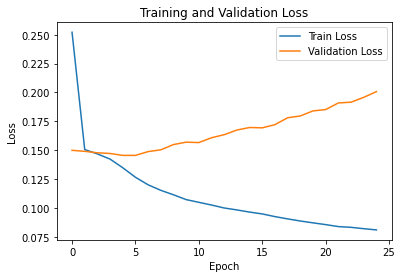

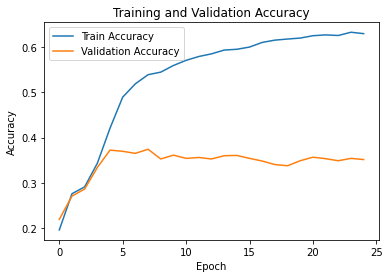

In [8]:
# Plot loss and accuracy curves
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Get actor name for prediction
actor_name = 'Tom Cruise'

# Create a sequence for the actor name
actor_seq = tokenizer.texts_to_sequences([actor_name])
actor_padded_seq = pad_sequences(actor_seq, maxlen=max_sequence_len, padding='post')

# Predict the genre for the actor name
predicted_genres = model.predict(actor_padded_seq)
predicted_genres = predicted_genres[0]

# Get the actual genre names
genre_names = genres.columns

# Create a dictionary with genre names and their probabilities
genre_probs = {}
for i in range(len(genre_names)):
    genre_probs[genre_names[i]] = predicted_genres[i]

# Print the predicted genres and their probabilities
print('Predicted genres for {}:'.format(actor_name))
for genre, prob in genre_probs.items():
    if prob > 0.5:  # Only consider genres with probability greater than 0.5
        print('{}: {}'.format(genre, prob))

1/1 [==============================] - 0s 469ms/step
Predicted genres for Actor Name:
Comedy: 0.5159762501716614


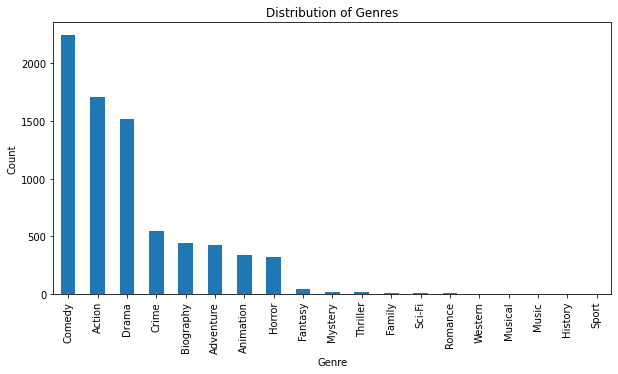

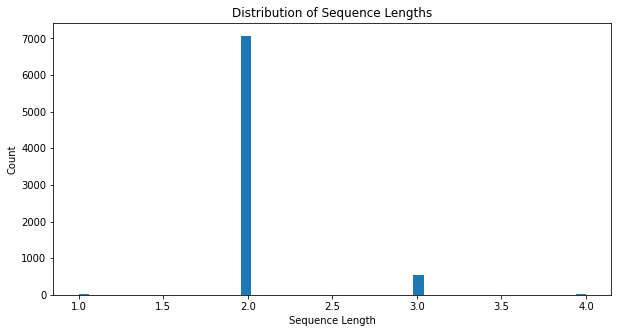

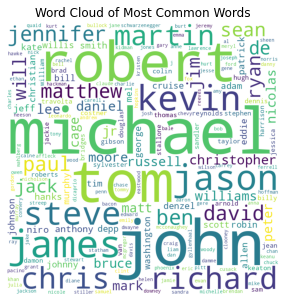

In [12]:
import matplotlib.pyplot as plt

# Plot distribution of genres
plt.figure(figsize=(10,5))
data['genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Plot distribution of sequence lengths
plt.figure(figsize=(10,5))
plt.hist([len(seq) for seq in sequences], bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.show()

# Plot word cloud of most common words
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=200).generate_from_frequencies(tokenizer.word_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Word Cloud of Most Common Words')
plt.axis('off')
plt.show()
